In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../Dataset/Embedding/'
outputFilename = 'delhiconventionalOutput.csv'

## With Word Embedding (BoW) Dataset

In [3]:
X = pd.read_csv(path+'delhi_WE_100.csv')
Y = pd.read_csv(path+'delhi_classLabel.csv')
print(X.shape,Y.shape)

(15438, 100) (15438, 1)


In [4]:
Y

,label
0,Others
1,Traffic information/advisory
2,Others
3,Others
4,Others
...,...
15433,Others
15434,Road closure
15435,Traffic congestion/heavy traffic
15436,Others


In [5]:
Y.label.value_counts()

Traffic obstruction/car breakdown    4831
Others                               3459
Traffic congestion/heavy traffic     2821
Road closure                         1487
Water logging                        1156
Traffic information/advisory         1001
City program                          416
Accident                              267
Name: label, dtype: int64

In [6]:
labels = Y.label.unique()
labels.sort()
labels

array(['Accident', 'City program', 'Others', 'Road closure',
       'Traffic congestion/heavy traffic', 'Traffic information/advisory',
       'Traffic obstruction/car breakdown', 'Water logging'], dtype=object)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y['label'])
print(X_train.shape, X_test.shape)

(11578, 100) (3860, 100)


In [8]:
model = SVC(probability=True)

model.fit(X_train,y_train)
#print("SVC Score = {}".format(model.score(X_train,y_train)))


SVC(probability=True)

In [9]:
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
pred_proba

array([[7.74418623e-05, 9.78923464e-01, 2.50680452e-03, ...,
        3.86500479e-04, 6.07485547e-04, 4.04609446e-04],
       [6.38428349e-03, 9.20939182e-03, 1.82214215e-01, ...,
        1.65692159e-01, 9.42622237e-03, 9.41914062e-03],
       [7.95794193e-07, 1.95920173e-06, 9.98696293e-01, ...,
        8.05966872e-05, 3.97720880e-06, 1.20035418e-03],
       ...,
       [2.46203778e-04, 6.08459220e-05, 2.54269938e-04, ...,
        1.71559611e-04, 9.98955062e-01, 1.59067048e-04],
       [2.12142935e-03, 6.65910274e-03, 5.01766851e-01, ...,
        3.66896785e-03, 4.64755854e-03, 1.05367945e-02],
       [1.79211727e-04, 1.95797609e-04, 2.39609471e-01, ...,
        1.84581655e-03, 1.42877397e-03, 7.61888772e-04]])

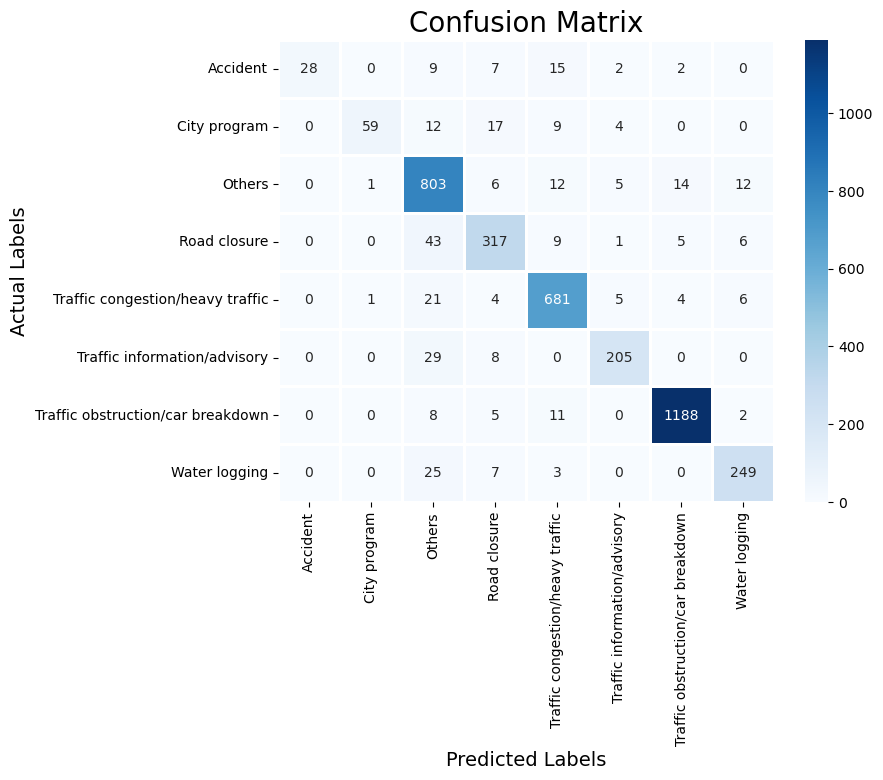

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
cm = pd.DataFrame(cm , index = [i for i in labels] , columns = [i for i in labels])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [11]:
# return (y_test, prediction)
print(classification_report(y_test, y_pred))
f1 = f1_score(y_true = y_test, y_pred = y_pred, labels = labels, average = 'micro')

print('F1-score: ',f1*100,'%')

                                   precision    recall  f1-score   support

                         Accident       1.00      0.44      0.62        63
                     City program       0.97      0.58      0.73       101
                           Others       0.85      0.94      0.89       853
                     Road closure       0.85      0.83      0.84       381
 Traffic congestion/heavy traffic       0.92      0.94      0.93       722
     Traffic information/advisory       0.92      0.85      0.88       242
Traffic obstruction/car breakdown       0.98      0.98      0.98      1214
                    Water logging       0.91      0.88      0.89       284

                         accuracy                           0.91      3860
                        macro avg       0.92      0.81      0.85      3860
                     weighted avg       0.92      0.91      0.91      3860

F1-score:  91.45077720207254 %


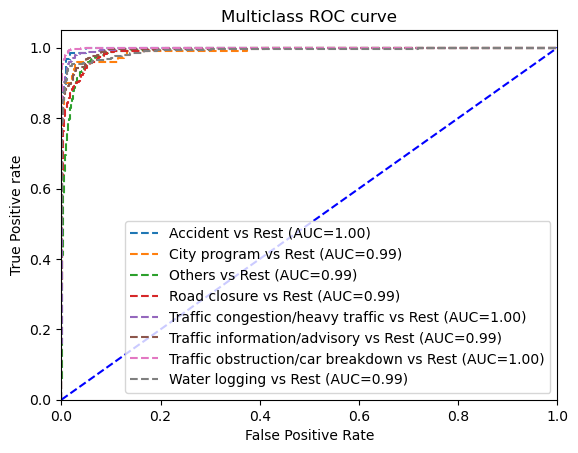

In [12]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,auc
pred_prob = pred_proba
from sklearn.preprocessing import label_binarize
#binarize the y_values

classes = np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

# n_class = len(labels)

for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [13]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore,_  = score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, pred_prob,multi_class='ovr')
print('Accuracy, precision, recall, fscore, Roc-AUC')
print('{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc))

Accuracy, precision, recall, fscore, Roc-AUC
0.915,0.924,0.806,0.845,0.993


In [14]:
import sys

with open(outputFilename, 'a') as f:
    print('SVM-w2v,{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc), file=f)

## With Infersent Embedding

In [15]:
X = pd.read_csv(path+'delhi_infercent_4096_2.csv')
X = X.iloc[:,1:]
# Y = pd.read_csv(path+'kolkata_classLabel_named.csv')
print(X.shape,Y.shape)

(15438, 4096) (15438, 1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y['label'])
print(X_train.shape, X_test.shape)

(11578, 4096) (3860, 4096)


In [17]:
model = SVC(probability=True)

model.fit(X_train,y_train)
#print("SVC Score = {}".format(model.score(X_train,y_train)))


SVC(probability=True)

In [18]:
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
pred_proba

array([[2.74555836e-10, 1.49422230e-10, 2.50671893e-10, ...,
        1.18485265e-10, 9.99998594e-01, 1.40447206e-06],
       [1.34390444e-09, 6.30498503e-10, 1.10919733e-09, ...,
        6.00551817e-10, 9.99999497e-01, 4.94909574e-07],
       [1.28947409e-03, 8.22934204e-04, 9.66219606e-01, ...,
        1.60585501e-03, 7.37938915e-04, 1.20552444e-03],
       ...,
       [1.14302935e-04, 7.00612698e-03, 6.91871794e-03, ...,
        6.32724363e-04, 2.31202488e-04, 1.73771577e-03],
       [1.35204031e-04, 9.76098641e-05, 8.24044115e-03, ...,
        1.73708894e-01, 9.83251553e-04, 6.38000467e-05],
       [3.29737124e-04, 4.13321924e-04, 7.43162360e-04, ...,
        6.96726235e-05, 9.90707550e-01, 2.39757820e-04]])

In [19]:
# return (y_test, prediction)
print(classification_report(y_test, y_pred))
f1 = f1_score(y_true = y_test, y_pred = y_pred, labels = labels, average = 'micro')

print('F1-score: ',f1*100,'%')

                                   precision    recall  f1-score   support

                         Accident       1.00      0.91      0.95        75
                     City program       0.98      0.88      0.93       111
                           Others       0.90      0.97      0.93       881
                     Road closure       0.97      0.89      0.92       378
 Traffic congestion/heavy traffic       0.96      0.96      0.96       673
     Traffic information/advisory       0.94      0.88      0.91       242
Traffic obstruction/car breakdown       0.99      0.99      0.99      1226
                    Water logging       0.97      0.97      0.97       274

                         accuracy                           0.96      3860
                        macro avg       0.96      0.93      0.95      3860
                     weighted avg       0.96      0.96      0.96      3860

F1-score:  95.72538860103627 %


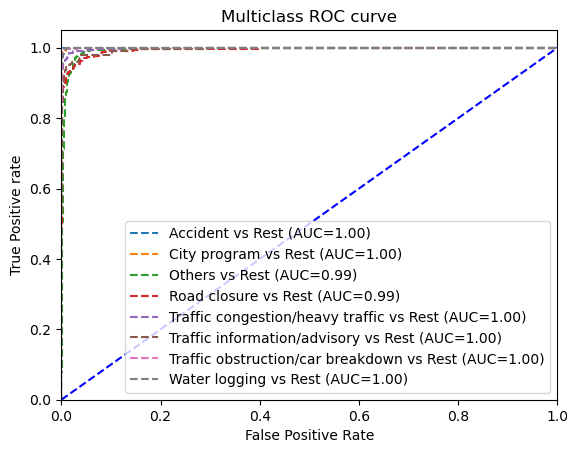

In [20]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,auc
pred_prob = pred_proba
from sklearn.preprocessing import label_binarize
#binarize the y_values

classes = np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

# n_class = len(labels)

for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [21]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore,_  = score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, pred_prob,multi_class='ovr')
print('Accuracy, precision, recall, fscore, Roc-AUC')
print('{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc))

Accuracy, precision, recall, fscore, Roc-AUC
0.957,0.965,0.931,0.947,0.998


In [22]:
import sys

with open(outputFilename, 'a') as f:
    print('SVM-infercent,{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc), file=f)